In [17]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

import get_data as gd
import compare_data as cd

<Axes: >

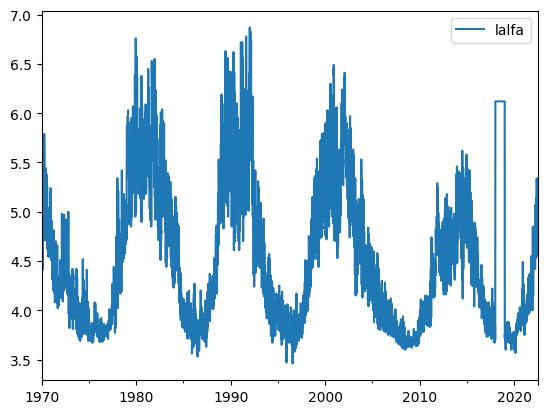

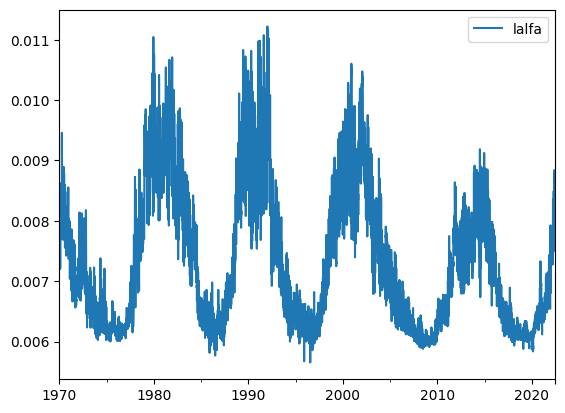

In [26]:
data = pd.read_pickle('data/final_inds.pkl')

start_date = datetime.datetime(1970, 1, 1)
end_date = datetime.datetime(2022, 6, 30)

initial_data = gd.get_data(start_date, end_date)
initial_data = gd.transform_data(initial_data)

# compare_1hour_data = cd.compare_data(data[0], initial_data[0])
# compare_3hour_data = cd.compare_data(data[1], initial_data[1])
# compare_24hour_data = cd.compare_data(data[2], initial_data[2])
# print(compare_1hour_data)
# print(compare_3hour_data)
# print(compare_24hour_data)

# print(data[1])
# print(initial_data[1])

# Данные из файла
data[2].plot(y=['lalfa'], kind='line')
# Полученные данные
initial_data[2].plot(y=['lalfa'], kind='line')

# Наложение графиков
# ax = data[2].plot(y='lalfa', kind='line', color='blue', label='Данные из файла')
# initial_data[2].plot(y='lalfa', kind='line', color='red', label='Полученные данные', ax=ax)
# plt.xlabel('Дата')
# plt.ylabel('Lalfa')
# plt.legend()
# plt.show()